# Vienen respuestas para la tarea normal y para el punto extra, en las funciones `main` y `main_extra` respectivamente.

In [149]:
%%sh
pip install matplotlib networkx


In [150]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt


In [151]:
# Algoritmo de costo uniforme
def costo_uniforme(inicio: str, objetivo: str, grafo: dict[str, dict[str, int]], imprimir:bool=False) -> tuple[float, list[str]]:
    cola_prioridad = []
    heapq.heappush(cola_prioridad, (0, inicio, [inicio]))  
    # Un heap es una estructura de datos 
    # basada en un árbol binario
    # heapq.heappush(heap, item): 
    # Agrega un nuevo elemento al montón.
    visitados = set()
    
    while cola_prioridad:
        costo_actual, nodo_actual, camino = heapq.heappop(cola_prioridad)
        costo_actual: float
        nodo_actual: str
        # heapq.heappop(heap):
        # Elimina y devuelve el
        # elemento más pequeño del montón.
        if imprimir:
            print("--------------------")
            print("Nodos visitados", visitados)
            print("Nodo Actual:", nodo_actual)
            print("Costo Actual:", costo_actual)
            print("Camino:", camino)
        
        # Si encontramos el nodo objetivo terminamos
        if nodo_actual == objetivo:
            return costo_actual, camino
        
        # Si no lo hemos visitado, lo añadimos a visitados
        if nodo_actual not in visitados:
            visitados.add(nodo_actual)
            for vecino, costo in grafo[nodo_actual].items():
                if vecino not in visitados: # Visitamos solo los vecinos NO visitados
                    nuevo_costo = costo_actual + costo
                    nuevo_camino = camino + [vecino]
                    heapq.heappush(cola_prioridad, (nuevo_costo, vecino, nuevo_camino))
            if imprimir:
                print("Cola:", cola_prioridad)

    # Si se termina la cola_prioridad, no se encuentra ruta y se señala mediante float('inf')
    return float('inf'), []

In [152]:
def printCaminos(caminos: list[list[str]]) -> None:
    # para una lista de caminos, se imprime cada camino en la forma:
    # 1: Nodo1 -> (...) -> Nodo2 
    for i, camino in enumerate(caminos):
        print(f"{i+1}:".rjust(3), ' -> '.join(camino))


def plotGrafo(grafo: dict[str, dict[str, int]], caminos_encontrados, label: str, nodo_inicio: str, nodo_objetivo: str) -> None:
    G = nx.Graph(grafo)

    # Se añaden los costos de viaje entre cada nodo al grafo de networkx
    for nodo, vecinos in grafo.items():
        for vecino, peso in vecinos.items():
            G.add_edge(nodo, vecino, weight=peso)    

    # Coloreamos los nodos según si están en algún camino o no
    colors = []
    for nodo in G.nodes():
        en_camino = False
        for camino in caminos_encontrados:
            if nodo in camino:
                en_camino = True
                break
        # Si son el nodo inicial o final los distinguimos con color naranja
        if (nodo == nodo_inicio) or (nodo == nodo_objetivo):
            colors.append("orange")
        # Si están en el camino encontrado se pintan verdes
        elif en_camino:
            colors.append('green')
        else:
            colors.append('cyan')

    # Dibujar el grafo
    pos = nx.spring_layout(G, k=0.15, iterations=20)
    labels = nx.get_edge_attributes(G, 'weight')
    plt.figure(1, figsize=(25, 12))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color=colors, font_size=12, font_weight='bold', )
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title(label)
    plt.show()


def busqueda(grafo, nodo_inicio: str, nodo_objetivo: str, imprimir=False) -> None:
    # Si ingresamos imprimir=False, la información sobre cada iteración no se imprime. 

    # Resultados de la búsqueda
    costo_minimo, camino_minimo = costo_uniforme(nodo_inicio, nodo_objetivo, grafo, imprimir=imprimir)

    # Si se encuentra un camino se imprime el costo mínimo y el camino
    if costo_minimo != float('inf'):
        print(f"El costo mínimo desde {nodo_inicio} hasta {nodo_objetivo} es: {costo_minimo}")
        print(f"El camino mínimo es:")
        printCaminos([camino_minimo])
        plotGrafo(grafo, camino_minimo, f"Costo mínimo: {costo_minimo}\n{nodo_inicio} -> {nodo_objetivo}", nodo_inicio, nodo_objetivo)
    else:
        print(f"No se encontró un camino desde {nodo_inicio} hasta {nodo_objetivo}")


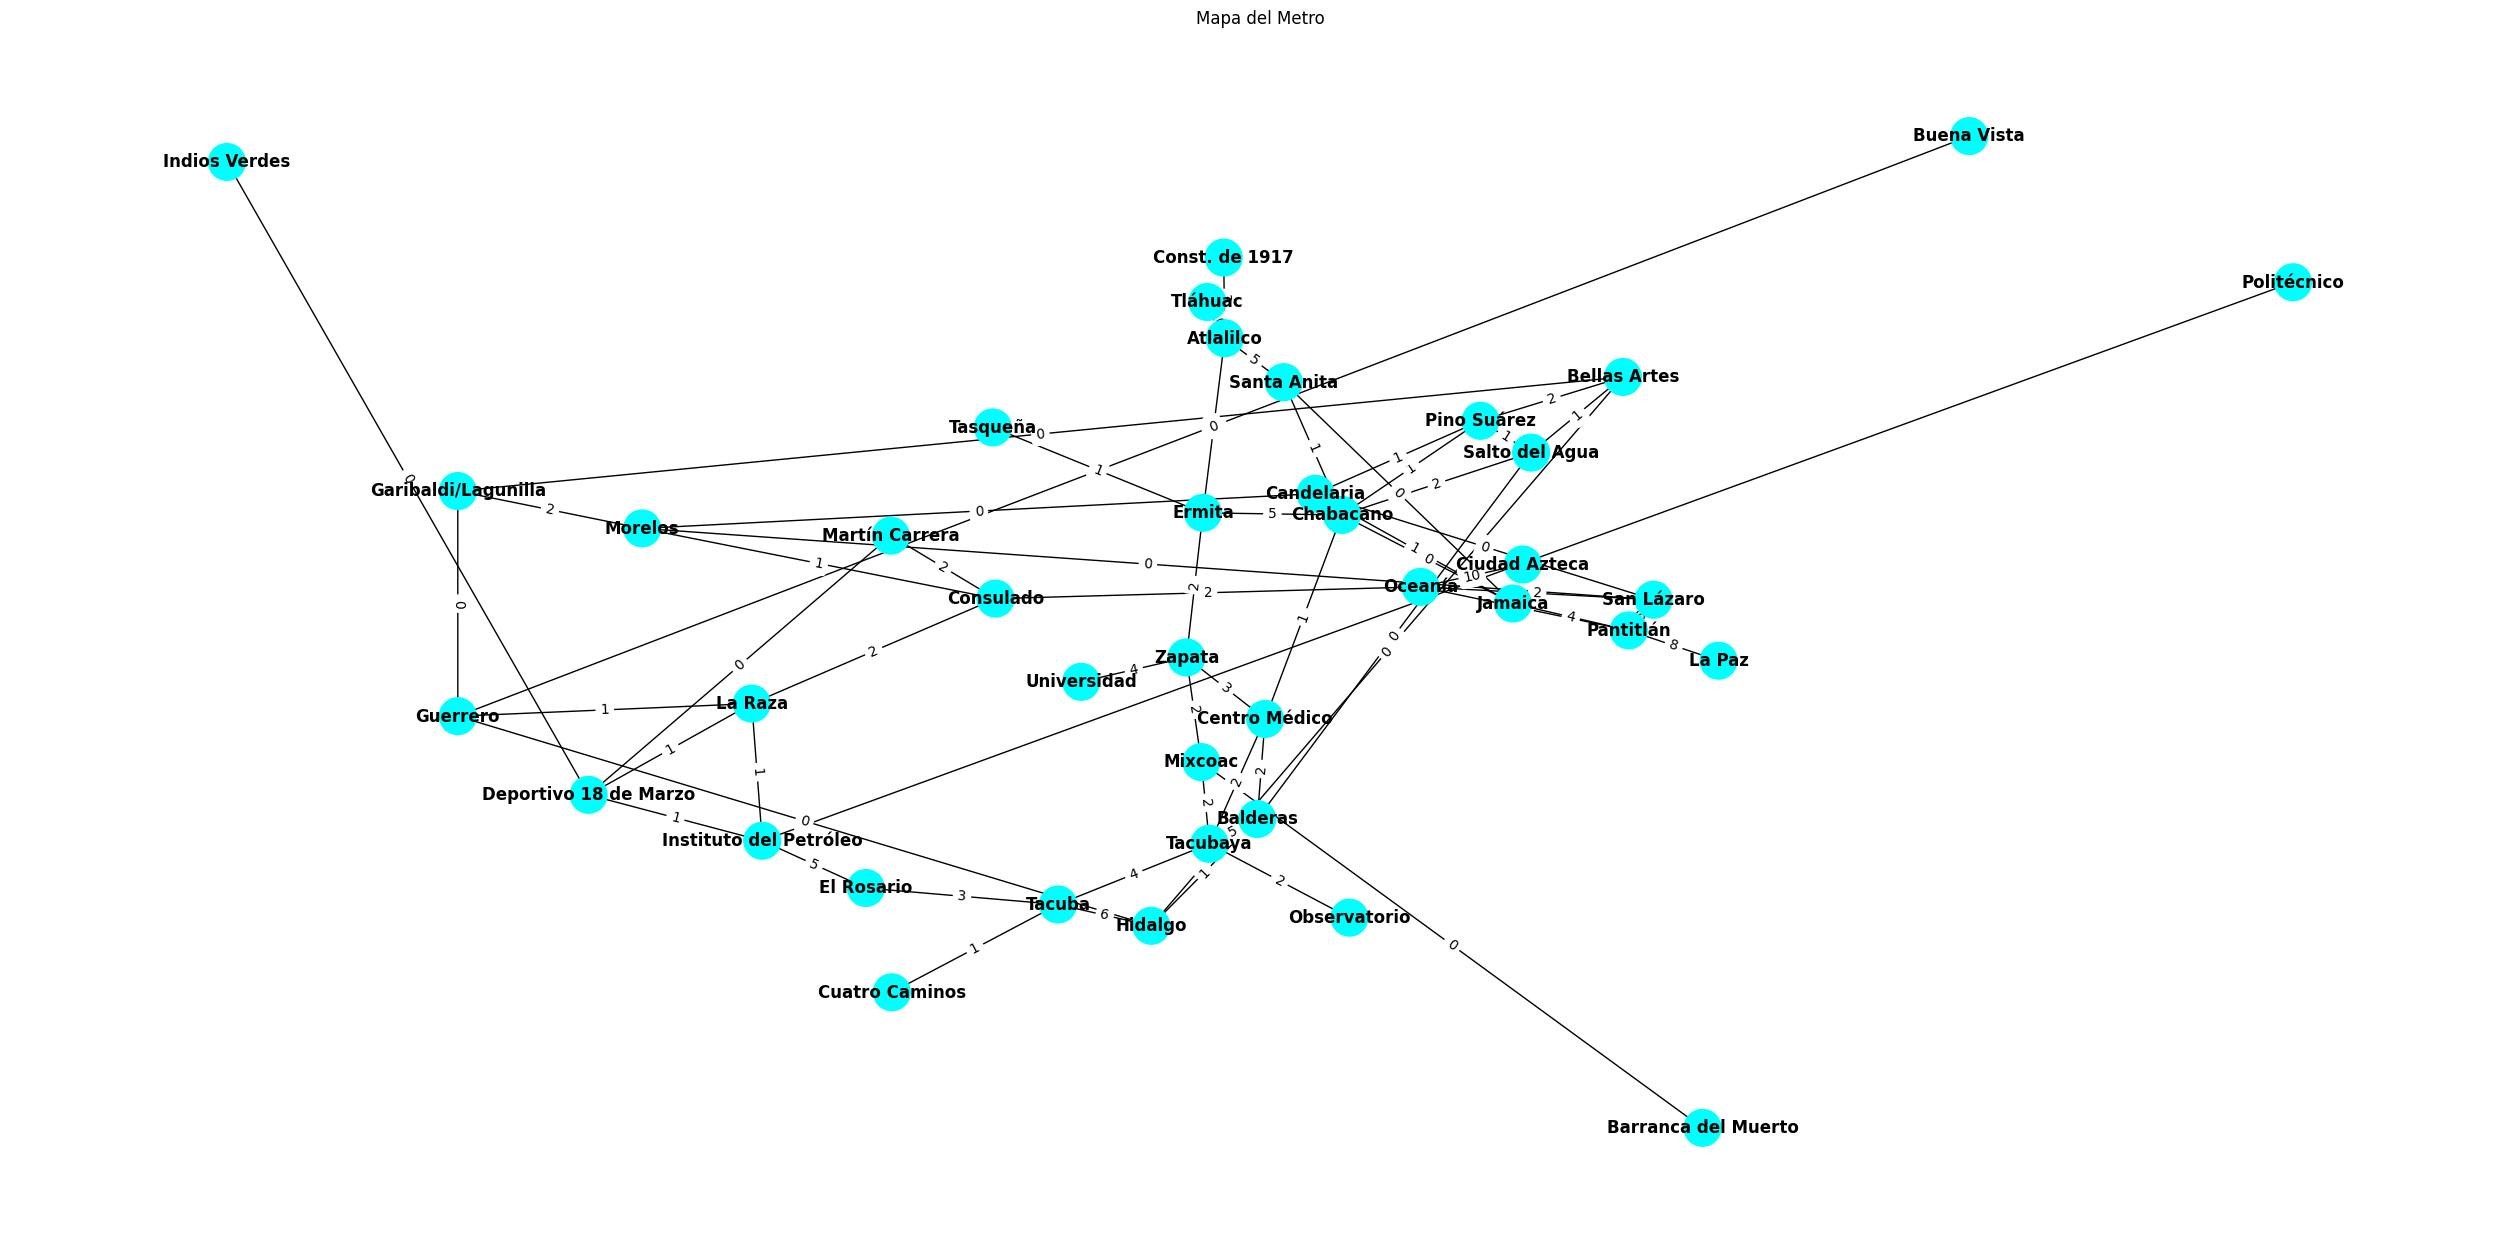

In [153]:
# Tenemos las siguientes estaciones interconectadas.
# Definimos el grafo como un diccionario de diccionarios de adyacencia con costos asociados.
grafo: dict[str, dict[str, int]] = {
    "El Rosario": {"Instituto del Petróleo": 5, "Tacuba": 3},
    "Tacuba": {"El Rosario": 3, "Cuatro Caminos": 1, "Tacubaya": 4, "Hidalgo": 6},
    "Cuatro Caminos": {"Tacuba": 1},
    "Tacubaya": {"Tacuba": 4, "Observatorio": 0, "Mixcoac": 2, "Centro Médico": 2, "Balderas": 5},
    "Observatorio": {"Tacubaya": 2},
    "Mixcoac": {"Barranca del Muerto": 0, "Zapata": 2, "Tacubaya": 2},
    "Barranca del Muerto": {"Mixcoac": 0},
    "Zapata": {"Mixcoac": 2, "Universidad": 4, "Ermita": 2, "Centro Médico": 3},
    "Universidad": {"Zapata": 4},
    "Ermita": {"Zapata": 2, "Tasqueña": 1, "Atlalilco": 1, "Chabacano": 5},
    "Tasqueña": {"Ermita": 1},
    "Atlalilco": {"Ermita": 1, "Tláhuac": 10, "Const. de 1917": 3, "Santa Anita": 5},
    "Const. de 1917": {"Atlalilco": 3},
    "Tláhuac": {"Atlalilco": 10},
    "Santa Anita": {"Atlalilco": 5, "Jamaica": 0, "Chabacano": 1},
    "Chabacano": {"Santa Anita": 1, "Jamaica": 0, "Pino Suárez": 1, "Salto del Agua": 2, "Centro Médico": 1, "Ermita": 5},
    "Centro Médico": {"Chabacano": 1, "Balderas": 2, "Tacubaya": 2, "Zapata": 3},
    "Balderas": {"Centro Médico": 2, "Tacubaya": 5, "Hidalgo": 1, "Salto del Agua": 0},
    "Salto del Agua": {"Pino Suárez": 1, "Bellas Artes": 1, "Balderas": 0, "Chabacano": 2},
    "Pino Suárez": {"Chabacano": 1, "Candelaria": 1, "Bellas Artes": 2, "Salto del Agua": 1},
    "Bellas Artes": {"Salto del Agua": 1, "Pino Suárez": 2, "Garibaldi/Lagunilla": 0, "Hidalgo": 0},
    "Hidalgo": {"Bellas Artes": 0, "Guerrero": 0, "Tacuba": 6, "Balderas": 1},
    "Buena Vista": {"Guerrero": 0},
    "Guerrero": {"Hidalgo": 0, "Garibaldi/Lagunilla": 0, "La Raza": 1},
    "La Raza": {"Guerrero": 1, "Consulado": 2, "Deportivo 18 de Marzo": 1, "Instituto del Petróleo": 1},
    "Instituto del Petróleo": {"La Raza": 1, "Deportivo 18 de Marzo": 1, "Politécnico": 0, "El Rosario": 5},
    "Politécnico": {"Instituto del Petróleo": 0},
    "Deportivo 18 de Marzo": {"La Raza": 1, "Martín Carrera": 1, "Indios Verdes": 0, "Instituto del Petróleo": 1},
    "Indios Verdes": {"Deportivo 18 de Marzo": 0},
    "Martín Carrera": {"Deportivo 18 de Marzo": 0, "Consulado": 2},
    "Consulado": {"Morelos": 1, "Oceanía": 2, "Martín Carrera": 2, "La Raza": 2},
    "Morelos": {"San Lázaro": 0, "Candelaria": 0, "Consulado": 1, "Garibaldi/Lagunilla": 2},
    "Garibaldi/Lagunilla": {"Bellas Artes": 0, "Morelos": 2, "Guerrero": 0},
    "Candelaria": {"San Lázaro": 0, "Morelos": 0, "Pino Suárez": 1, "Jamaica": 1},
    "Jamaica": {"Santa Anita": 0, "Pantitlán": 4, "Candelaria": 1, "Chabacano": 0},
    "Pantitlán": {"Jamaica": 4, "La Paz": 8, "Oceanía": 2, "San Lázaro": 5},
    "La Paz": {"Pantitlán": 8},
    "San Lázaro": {"Pantitlán": 5, "Candelaria": 0, "Oceanía": 2, "Morelos": 0},
    "Oceanía": {"San Lázaro": 2, "Pantitlán": 2, "Ciudad Azteca": 10, "Consulado": 2},
    "Ciudad Azteca": {"Oceanía": 10},

    }

# Mostramos grafo inicial
plotGrafo(grafo, [], "Mapa del Metro", "", "")

El costo mínimo desde Mixcoac hasta Ermita es: 4
El camino mínimo es:
 1: Mixcoac -> Zapata -> Ermita


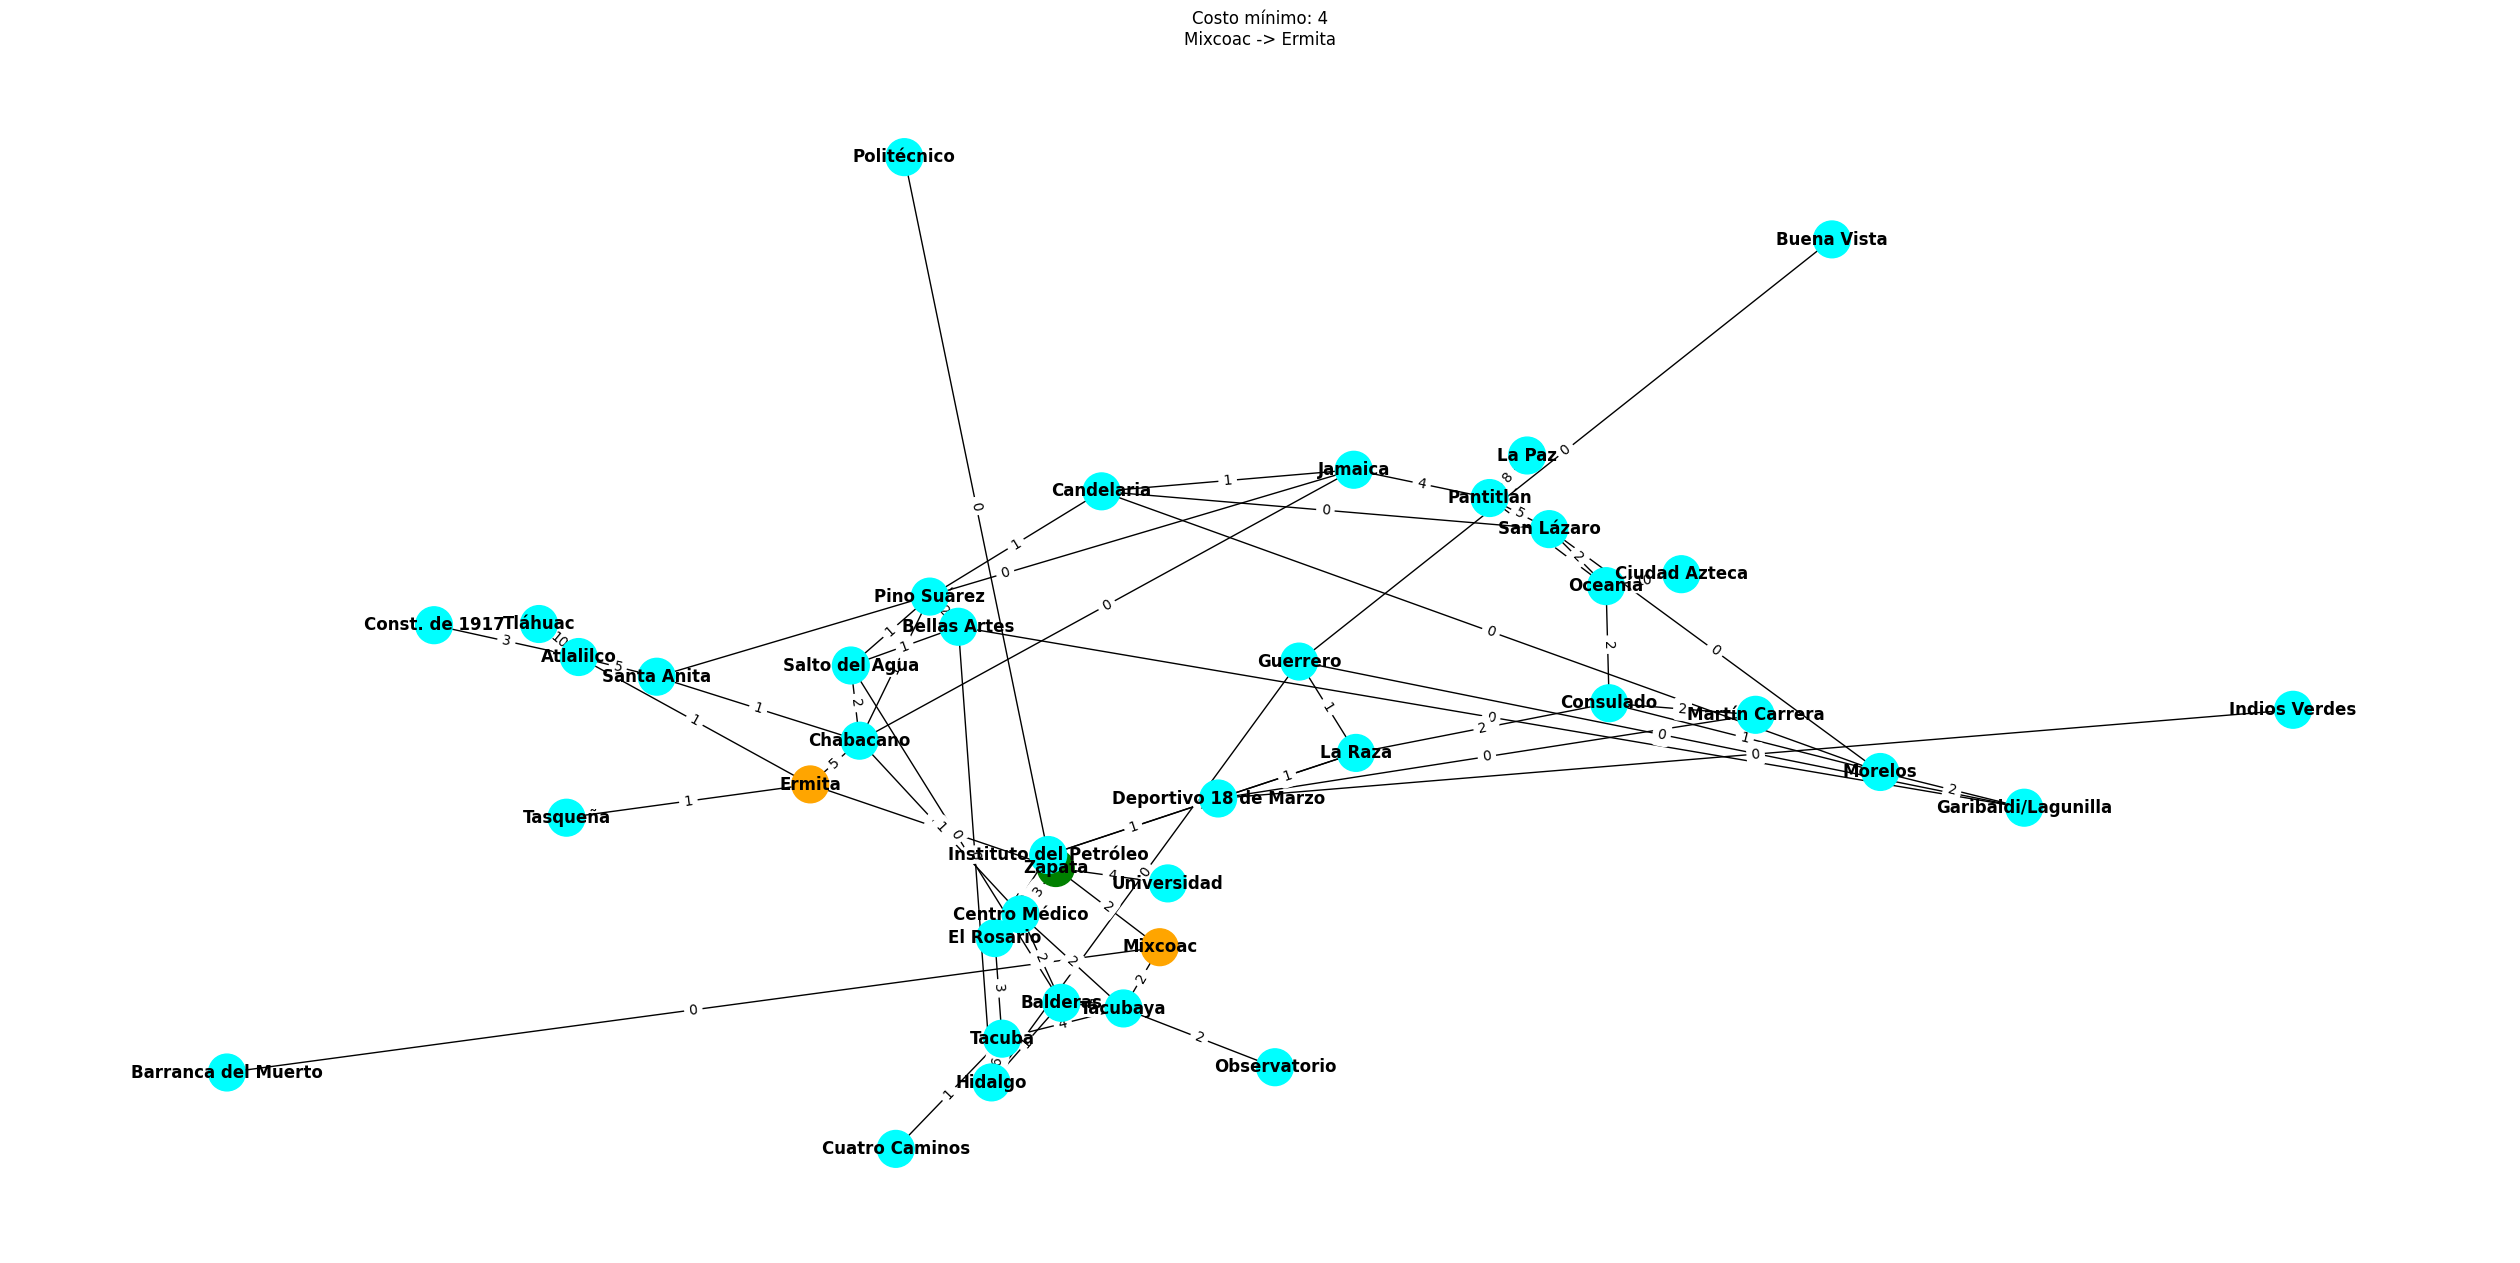

In [154]:
# Inicio de sección interactiva
def main() -> None:
    # # Nodo de inicio y nodo objetivo
    # nodo_inicio = 'Mixcoac'
    # nodo_objetivo = 'Indios Verdes'
    nodo_inicio: str = input("Ingrese la estación de inicio: ")
    nodo_objetivo: str = input("Ingrese la estación final: ")

    # Se ejecuta la búsqueda, incluyendo la muestra de resultados y el gráfico
    busqueda(grafo, nodo_inicio, nodo_objetivo, imprimir=False)

main()

# PUNTO EXTRA ABAJO

# Punto extra

Con las estaciones cerradas:
 * Zapata
El costo mínimo desde Mixcoac hasta Ermita es: 10
El camino mínimo es:
 1: Mixcoac -> Tacubaya -> Centro Médico -> Chabacano -> Ermita


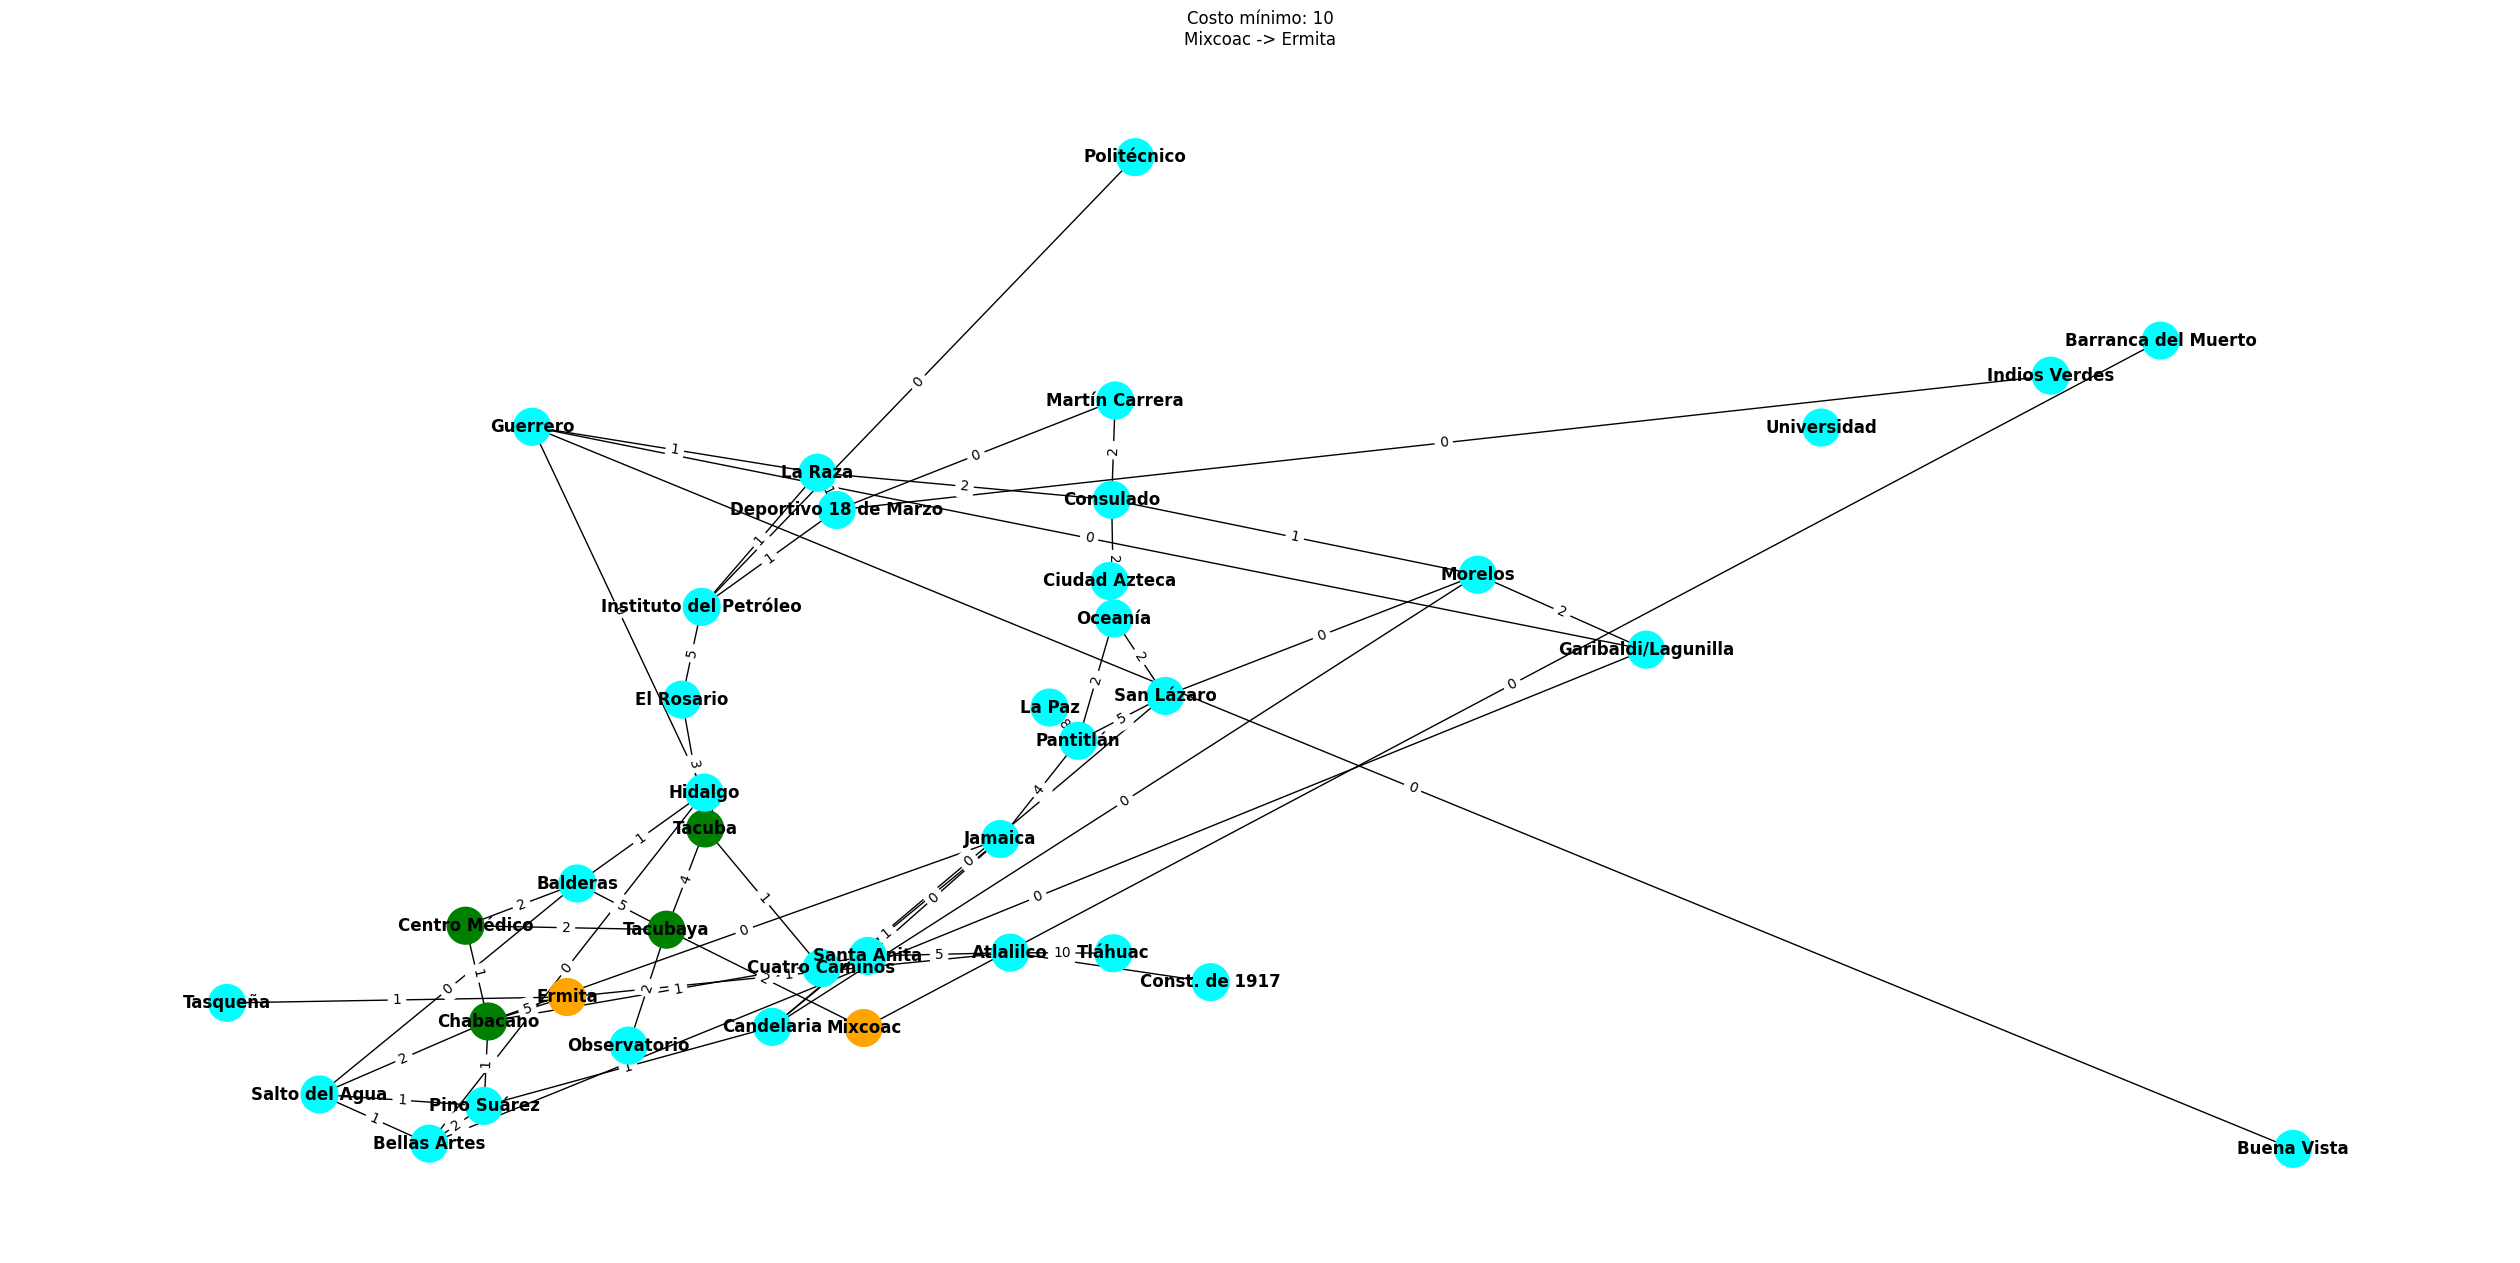

In [155]:
def cerrar_estaciones(grafo: dict[str, dict[str, int]], estaciones_a_cerrar: list[str]) -> dict[str, dict[str, int]]:
    grafoActualizado: dict[str, dict[str, int]] = dict()
    for k in grafo.keys():
        # Se copian, pues sino se modificarían los valores del grafo original
        grafoActualizado[k] = grafo[k].copy()

    for estacion in estaciones_a_cerrar:
        # Del pop obtenemos las demas estaciones con las que la estacion cerrada
        # estaba conectada. Iteramos sobre cada elemento de esta lista para eliminar
        # previas conecciones a la estacion cerrada.
        lista_conectados = grafoActualizado.pop(estacion).keys()
        for conectado in lista_conectados:
            # Se deja pasar la excepción si dos estaciones adyacentes están cerradas.
            try:
                grafoActualizado[conectado].pop(estacion)
            except KeyError:
                pass
    return grafoActualizado
  

def main_extra() -> None:
    # Nodo de inicio y nodo objetivo
    # nodo_inicio = 'Mixcoac'
    # nodo_objetivo = 'Ermita'
    nodo_inicio: str = input("Ingrese la estación de inicio: ")
    nodo_objetivo: str = input("Ingrese la estación final: ")

    estaciones_cerradas: list[str] = []
    while True:
        estacion_cerrada_actual: str = input("Ingresa una estación cerrada (ENTER para terminar): ").strip()
        if len(estacion_cerrada_actual) == 0:
            break
        estaciones_cerradas.append(estacion_cerrada_actual)

    # Se crea una copia del grafo original sin las estaciones cerradas
    grafoActualizado = cerrar_estaciones(grafo, estaciones_cerradas)

    if estaciones_cerradas:
        print(f"Con las estaciones cerradas:\n * {"\n * ".join(estaciones_cerradas)}")
    # Se ejecuta la búsqueda, incluyendo la muestra de resultados y el gráfico
    busqueda(grafoActualizado, nodo_inicio, nodo_objetivo, imprimir=False)

main_extra()
